#The rapid spread of the virus necessitates the development of a system for its detection. With the increasing use of technology, a wealth of data about COVID-19 is readily available, which can be harnessed to gather essential information about the virus. In this project, we compared the accuracy of various machine learning algorithms in predicting COVID-19 outcomes and selected the most accurate one for the final model testing. With just eight binary features, our model achieved high accuracy in predicting COVID-19 test results. This paper suggests a practical solution through the development of a health monitoring system that can mitigate the impact of COVID-19.

Importing the required libraries

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd

# Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

(1) Understanding the Data\
(2) Exploratory Data Analysis\
(3) Data Prepration\
(4) Model Training\
(5) Model Evaluation

In [ ]:
#Understanding the Data

In [ ]:
#Load Dataset
df = pd.read_csv("/content/corona_tested_006.csv")

In [ ]:
#create a copy of dataset
covid_data = df.copy()

In [ ]:
#to display first 5 rows
covid_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [ ]:
# Number of Row and Columns
covid_data.shape

(278848, 11)

The shape function returns the number of rows and columns present in the COVID dataset, which contains 278,848 rows and 11 columns.

In [ ]:
# to know the column name of Dataset
covid_data.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

The column function returns the names of the columns present in the COVID dataset.

In [ ]:
# to get overview of dataframe columns
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


-The info() function is used to display a concise summary of a covid_data set.
-The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [ ]:
# to generates various statistics summary
covid_data.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278596,278596,278847,278847,278847,278848,151528,259285,278848
unique,NaN,51,2,2,2,2,2,3,2,2,3
top,NaN,20-04-2020,False,False,False,False,False,negative,No,female,Other
freq,NaN,10921,236368,256844,276921,277270,276433,260227,125703,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The describe() function is used to generate descriptive statistics for a DataFrame.

In [ ]:
# to find out null values in all columns
covid_data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [ ]:
# to display percentage of null values in columns
covid_data.isnull().mean()*100

Ind_ID                  0.000000
Test_date               0.000000
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  0.000000
Age_60_above           45.659284
Sex                     7.015650
Known_contact           0.000000
dtype: float64

In [ ]:
# To drop columns by column name
covid_data = covid_data.drop(['Ind_ID', 'Test_date'], axis=1)

The drop() function in pandas is used to remove specific rows or columns from a DataFrame

In [ ]:
#Understanding the records in each column

for column_name in covid_data.columns:
    unique_values = covid_data[column_name].unique()
    print(f"Unique values in '{column_name}': {unique_values}")

Unique values in 'Cough_symptoms': [True False nan]
Unique values in 'Fever': [False True nan]
Unique values in 'Sore_throat': [True False nan]
Unique values in 'Shortness_of_breath': [False True nan]
Unique values in 'Headache': [False True nan]
Unique values in 'Corona': ['negative' 'positive' 'other']
Unique values in 'Age_60_above': [nan 'No' 'Yes']
Unique values in 'Sex': [nan 'male' 'female']
Unique values in 'Known_contact': ['Abroad' 'Contact with confirmed' 'Other']


Dealing with missing value

In [ ]:
# Fill missing values with the mode

covid_data['Cough_symptoms'].fillna(covid_data['Cough_symptoms'].mode()[0], inplace=True)
covid_data['Fever'].fillna(covid_data['Fever'].mode()[0], inplace=True)
covid_data['Sore_throat'].fillna(covid_data['Sore_throat'].mode()[0], inplace=True)
covid_data['Shortness_of_breath'].fillna(covid_data['Shortness_of_breath'].mode()[0], inplace=True)
covid_data['Headache'].fillna(covid_data['Headache'].mode()[0], inplace=True)

In [ ]:
covid_data["Age_60_above"].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [ ]:
covid_data["Age_60_above"].value_counts()

Age_60_above
No     125703
Yes     25825
Name: count, dtype: int64

In [ ]:
# Fill missing values in the 'Age_60_above' column using the forward fill method
covid_data['Age_60_above'].fillna(method='bfill', inplace=True)

In [ ]:
covid_data["Age_60_above"].value_counts()

Age_60_above
No     253023
Yes     25825
Name: count, dtype: int64

In [ ]:
covid_data['Sex'].unique()

array([nan, 'male', 'female'], dtype=object)

In [ ]:
covid_data['Sex'].value_counts()

Sex
female    130158
male      129127
Name: count, dtype: int64

In [ ]:
# Fill missing values in the 'Sex' column using the backword fill method
covid_data['Sex'].fillna(method='bfill', inplace=True)

In [ ]:
covid_data['Sex'].value_counts()

Sex
male      145878
female    132970
Name: count, dtype: int64

In [ ]:
covid_data.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
covid_data["Corona"].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [ ]:
covid_data['Corona'].value_counts()

Corona
negative    260227
positive     14729
other         3892
Name: count, dtype: int64

In [ ]:
#  Replace 'other' with the next valid value using forward fill (ffill)
covid_data["Corona"].replace('other', method='ffill', inplace=True)

In [ ]:
covid_data['Corona'].value_counts()

Corona
negative    263540
positive     15308
Name: count, dtype: int64

In [ ]:
#creates a count plot with bars representing the counts of Covid_patients:

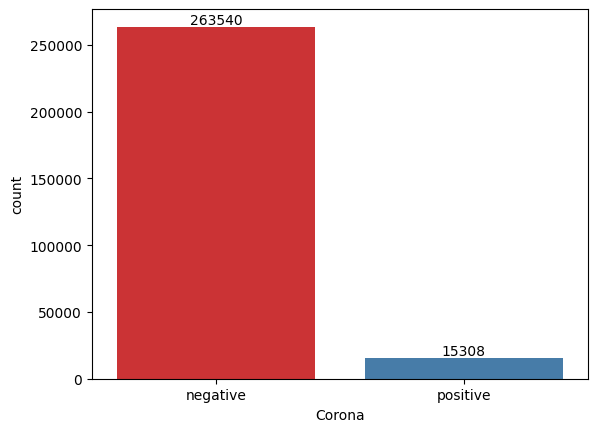

In [ ]:
ax = sns.countplot(x='Corona',data=covid_data, palette="Set1")
for bars in ax.containers:
    ax.bar_label(bars)

-The graph above shows the number of COVID-19 patients. There are 15,308 positive patients, and 263,540 are negative. Therefore, the number of negative patients is greater than the number of positive ones

-we can see above there is huge class imbalance in label column.

In [ ]:
covid_data.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,True,False,True,False,False,negative,No,male,Abroad
1,False,True,False,False,False,positive,No,male,Abroad
2,False,True,False,False,False,positive,No,male,Abroad
3,True,False,False,False,False,negative,No,male,Abroad
4,True,False,False,False,False,negative,No,male,Contact with confirmed


Cough_symptoms
False    236620
True      42228
Name: count, dtype: int64

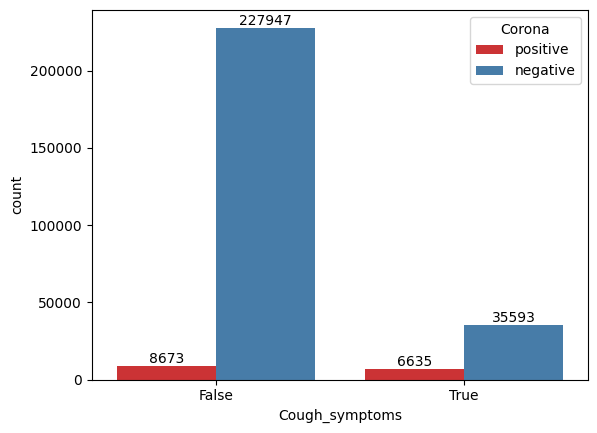

In [ ]:
#creates a count plot with bars representing the counts of Cough_symptoms:
ax = sns.countplot(x='Cough_symptoms',hue='Corona',data=covid_data, palette="Set1")
for bars in ax.containers:
    ax.bar_label(bars)

covid_data['Cough_symptoms'].value_counts()

Fever
False    257096
True      21752
Name: count, dtype: int64

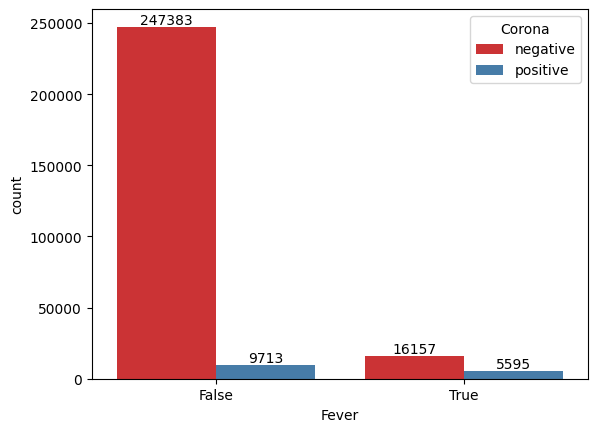

In [ ]:
#creates a countplot with bars representing the counts of Fever

ax = sns.countplot(x='Fever',hue='Corona',data=covid_data, palette="Set1")
for bars in ax.containers:
    ax.bar_label(bars)

covid_data['Fever'].value_counts()


Sore_throat
False    276922
True       1926
Name: count, dtype: int64

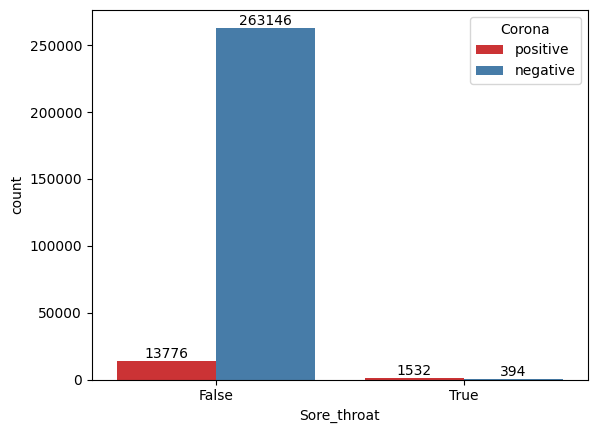

In [ ]:
#creates a countplot with bars representing the counts of Sore_throat

ax = sns.countplot(x='Sore_throat',hue='Corona',data=covid_data, palette="Set1")
for bars in ax.containers:
    ax.bar_label(bars)

covid_data['Sore_throat'].value_counts()

Shortness_of_breath
False    277271
True       1577
Name: count, dtype: int64

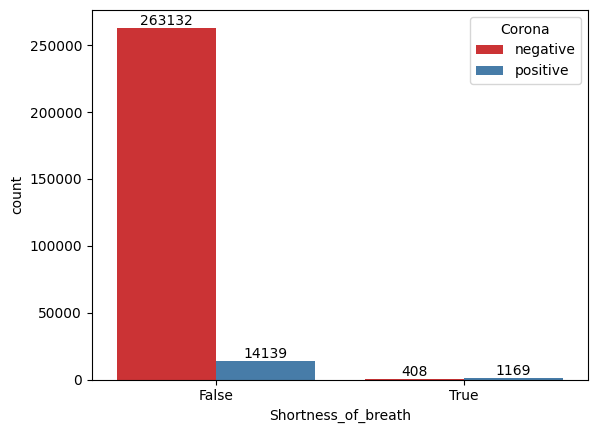

In [ ]:
#creates a countplot with bars representing the counts of Shortness_of_breath
ax = sns.countplot(x='Shortness_of_breath',hue='Corona',data=covid_data, palette="Set1")
for bars in ax.containers:
    ax.bar_label(bars)

covid_data['Shortness_of_breath'].value_counts()

Headache
False    276434
True       2414
Name: count, dtype: int64

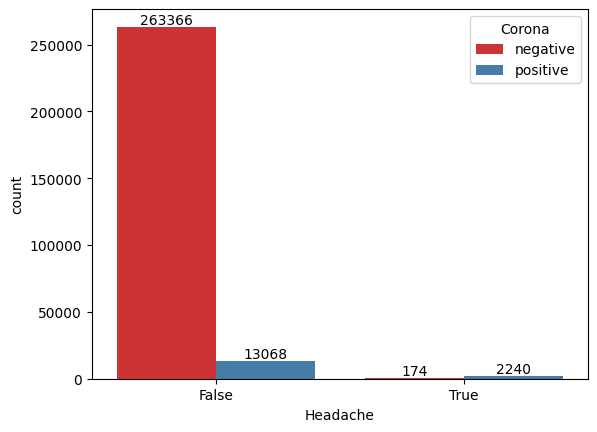

In [ ]:
#creates a count plot with bars representing the counts of Headache

ax = sns.countplot(x='Headache',hue='Corona',data=covid_data, palette="Set1")
for bars in ax.containers:
    ax.bar_label(bars)

covid_data['Headache'].value_counts()

Age_60_above
No     253023
Yes     25825
Name: count, dtype: int64

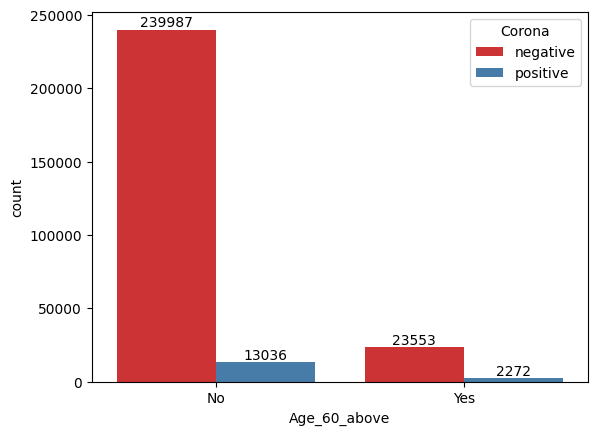

In [ ]:
#creates a countplot with bars representing the counts of Age_60_above

ax = sns.countplot(x='Age_60_above',hue='Corona',data=covid_data, palette="Set1")
for bars in ax.containers:
    ax.bar_label(bars)

covid_data['Age_60_above'].value_counts()

Sex
male      145878
female    132970
Name: count, dtype: int64

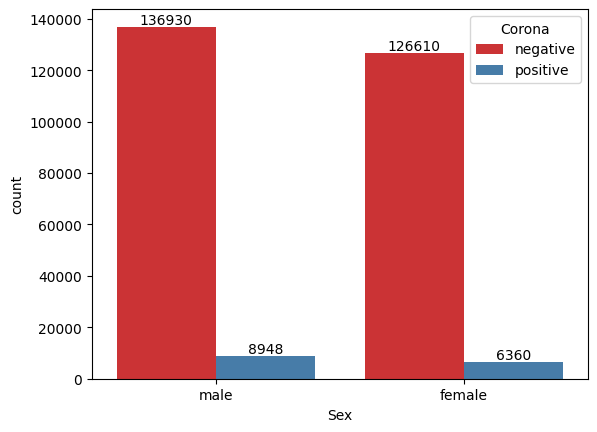

In [ ]:
#creates a countplot with bars representing the counts of sex

ax = sns.countplot(x='Sex',hue='Corona',data=covid_data, palette="Set1")
for bars in ax.containers:
    ax.bar_label(bars)

covid_data['Sex'].value_counts()

Known_contact
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64

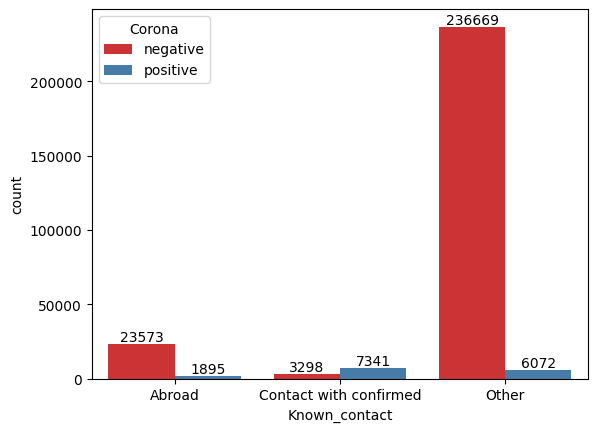

In [ ]:
#creates a countplot with bars representing the counts of known_contact

ax = sns.countplot(x='Known_contact',hue='Corona',data=covid_data, palette="Set1")
for bars in ax.containers:
    ax.bar_label(bars)

covid_data['Known_contact'].value_counts()

In [ ]:
#checking datatype of features
covid_data.dtypes

Cough_symptoms           bool
Fever                    bool
Sore_throat              bool
Shortness_of_breath      bool
Headache                 bool
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

#Encoding the Features

In [ ]:
#import Label encoder
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

In [ ]:
# List of columns to convert
boolean_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Apply label encoding to each boolean column
for column in boolean_columns:
    covid_data[column] = le.fit_transform(covid_data[column])

# Display the DataFrame with encoded values
print(covid_data)

        Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0                    1      0            1                    0         0   
1                    0      1            0                    0         0   
2                    0      1            0                    0         0   
3                    1      0            0                    0         0   
4                    1      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
278843               0      0            0                    0         0   
278844               0      0            0                    0         0   
278845               0      0            0                    0         0   
278846               0      0            0                    0         0   
278847               0      0            0                    0         0   

          Corona Age_60_above     Sex           Known_contact  
0       neg

In [ ]:
# Create an instance of the OneHotEncoder
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# Specify the columns to one-hot encode
columns_to_encode = ["Age_60_above", "Sex", "Known_contact", "Corona"]

# Fit and transform the specified columns
encoded_columns = ohe.fit_transform(covid_data[columns_to_encode])

# Create a DataFrame from the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(input_features=columns_to_encode))

# Convert the data type of the one-hot encoded columns to integer
encoded_df = encoded_df.astype(int)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
covid_data_encoded = pd.concat([covid_data.drop(columns=columns_to_encode), encoded_df], axis=1)

print(covid_data_encoded)

        Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0                    1      0            1                    0         0   
1                    0      1            0                    0         0   
2                    0      1            0                    0         0   
3                    1      0            0                    0         0   
4                    1      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
278843               0      0            0                    0         0   
278844               0      0            0                    0         0   
278845               0      0            0                    0         0   
278846               0      0            0                    0         0   
278847               0      0            0                    0         0   

        Age_60_above_Yes  Sex_male  Known_contact_Contact with confirmed  \

In [ ]:
print(covid_data_encoded.dtypes)

Cough_symptoms                          int64
Fever                                   int64
Sore_throat                             int64
Shortness_of_breath                     int64
Headache                                int64
Age_60_above_Yes                        int64
Sex_male                                int64
Known_contact_Contact with confirmed    int64
Known_contact_Other                     int64
Corona_positive                         int64
dtype: object


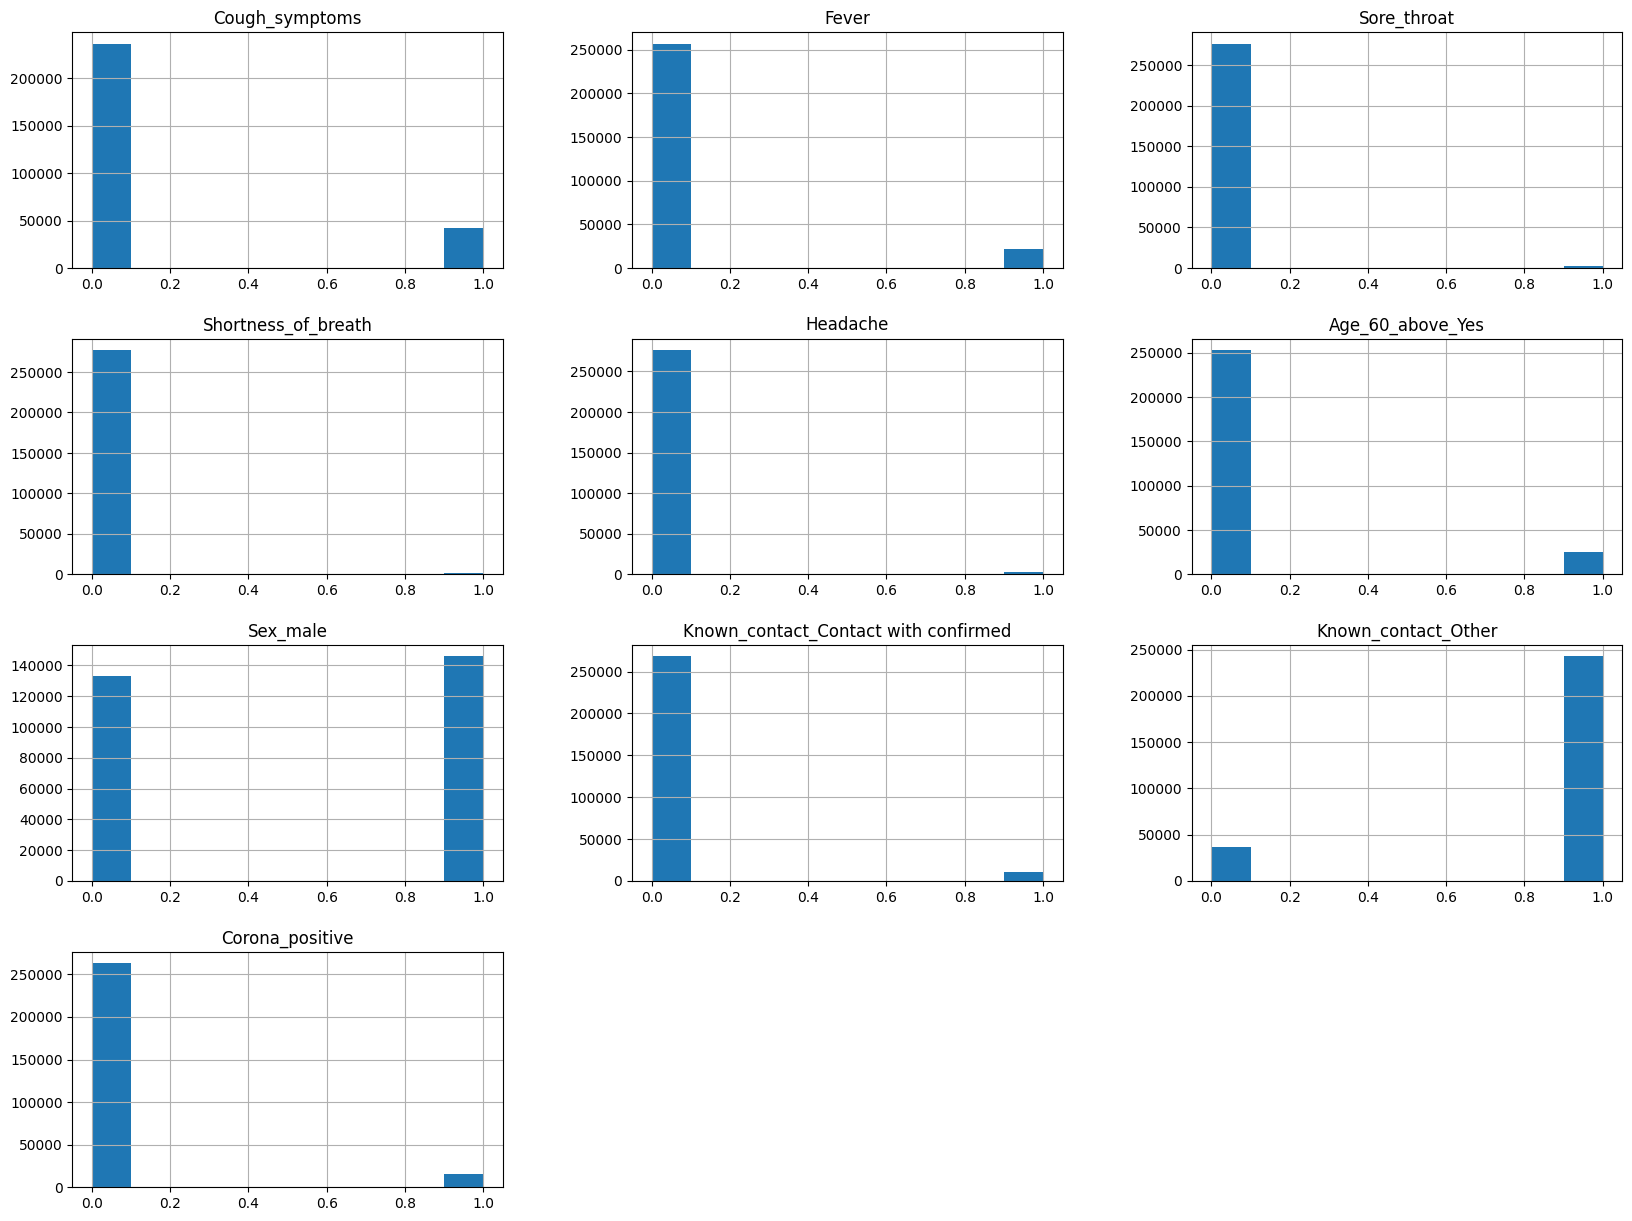

In [ ]:
#create a histogram for each column
covid_data_encoded.hist(figsize=(20,15))
plt.show()

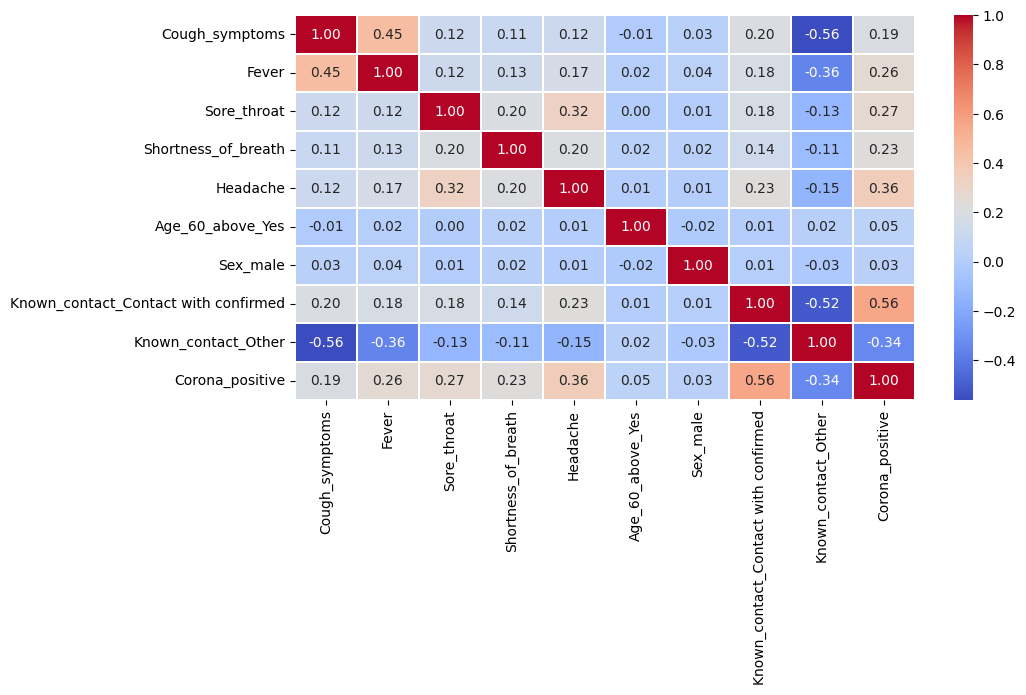

In [ ]:
# Calculate the correlation matrix
correlation_matrix =covid_data_encoded.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.3)
plt.tick_params(axis='both', labelsize=10)
plt.xticks(rotation=90)
plt.show()

Split data into independent and dependent variable.

In [ ]:
#Extracting Independent and dependent Variable

X= covid_data_encoded.drop(['Corona_positive'], axis =1)
y= covid_data_encoded['Corona_positive']

In [ ]:
#Independent variables
X.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above_Yes,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,1,0


In [ ]:
#Dependent variables
y.head()

0    0
1    1
2    1
3    0
4    0
Name: Corona_positive, dtype: int64

In [ ]:
y.value_counts()

Corona_positive
0    263540
1     15308
Name: count, dtype: int64

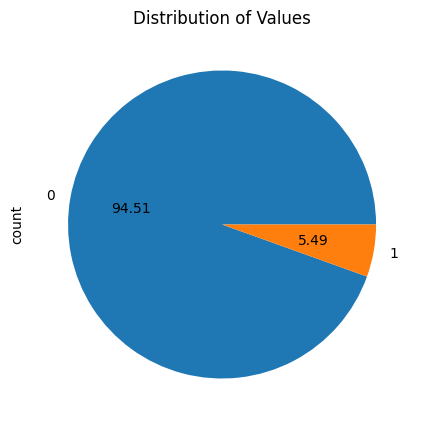

In [ ]:
# Create a pie chart
plt.figure(figsize=(5, 5))
y.value_counts().plot(kind="pie",autopct='%.2f')

# Add a title
plt.title('Distribution of Values')

# Show the plot
plt.show()

The data have been shown is imbalanced. In imbalanced data, one class (in this case, "0") significantly outnumbers the other class ("1"). Imbalanced datasets can pose challenges when training machine learning models because the model may become biased toward the majority class and perform poorly on the minority class.

In [ ]:
#Undersampling the Data

In [ ]:
# import the RandomUnderSampler class from imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto',random_state=10)

X_res, y_res = rus.fit_resample(X, y)

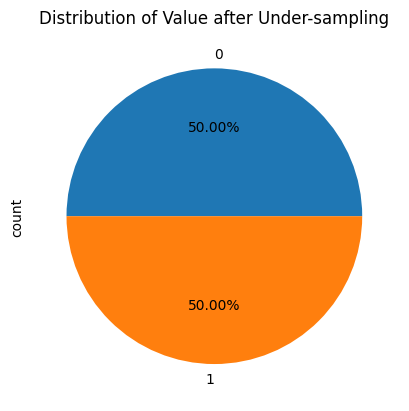

In [ ]:
# Assuming y_res is a pandas Series
ax = y_res.value_counts().plot(kind='pie',autopct='%.2f%%')

# Set the title for the pie chart
ax.set_title("Distribution of Value after Under-sampling")

# Display the pie chart
plt.show()

In [ ]:
y_res.value_counts()

Corona_positive
0    15308
1    15308
Name: count, dtype: int64

Splitting the dataset into train and test set

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X_res,y_res, test_size=0.3,random_state=25)

In [ ]:
print(X_res.shape, X_train.shape, X_test.shape)

(30616, 9) (21431, 9) (9185, 9)


In [ ]:
print(y_res.shape, y_train.shape, y_test.shape)

(30616,) (21431,) (9185,)


#Implementing the Logistic Regression Model

In [ ]:
#Fitting the Logistic Regression model

from sklearn.linear_model import LogisticRegression

#import metrics
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score

In [ ]:
log = LogisticRegression(random_state = 52)

In [ ]:
# Passing independent and dependent training data to the model for training
log.fit(X_train,y_train)

LogisticRegression(random_state=52)

In [ ]:
# accuracy on training data

In [ ]:
y_train_pred_lr = log.predict(X_train)
training_data_accuracy_lr = accuracy_score(y_train_pred_lr, y_train)

print(training_data_accuracy_lr)

0.8259063972749755


In [ ]:
# accuracy on test data

In [ ]:
y_test_pred_lr =log.predict(X_test)
test_data_accuracy_lr = accuracy_score(y_test_pred_lr, y_test)

print(test_data_accuracy_lr)

0.833097441480675


Evaluating the Model

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      4569
           1       0.91      0.74      0.82      4616

    accuracy                           0.83      9185
   macro avg       0.85      0.83      0.83      9185
weighted avg       0.85      0.83      0.83      9185



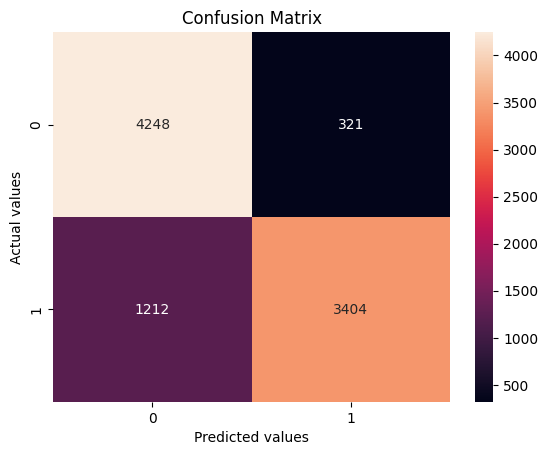

In [ ]:
#Confusion matrix and classification report
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

print(classification_report(y_test, y_test_pred_lr))


There were 30616 records in dataset,out of which 70% of the data was given for training the model and 30% of the data , i.e 9185 records ,were given for testing the model. and out of 9185 records ,1533 records were misclassified.

#Implementing the Decision Tree Model

In [ ]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn import tree

In [ ]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

In [ ]:
#accuracy on training data

In [ ]:
y_train_pred_dt = classification.predict(X_train)
training_data_accuracy_dt = accuracy_score(y_train,y_train_pred_dt)

print(training_data_accuracy_dt)

0.8401381176799962


In [ ]:
#accuracy on test data

In [ ]:
#Predict the response for test dataset
y_test_pred_dt = classification.predict(X_test)

# Model Accuracy score,
test_data_accuracy_dt = accuracy_score(y_test,y_test_pred_dt)
print(test_data_accuracy_dt)

0.8437670114316821


Hyperparameter tuning

In [ ]:
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Initialize the DecisionTreeClassifier as the estimator
estimator= DecisionTreeClassifier()

param_grid = {"criterion": ["gini","entropy"], "max_depth": list(range(1,9))}


# Setup GridSearchCV with the estimator, parameter grid, 5-fold cross-validation, and accuracy scoring
cv_classifier = GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')

# Fit the GridSearchCV  to the training data
cv_classifier.fit(X_train,y_train)

# Print the best parameters found by GridSearchCV
cv_classifier.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [ ]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion='gini',max_depth =8)

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

In [ ]:
#accuracy on training data
y_train_pred_dt = classification.predict(X_train)
training_data_accuracy_dt = accuracy_score(y_train,y_train_pred_dt)

print(training_data_accuracy_dt)

0.8397181652746022


In [ ]:
#Predict the response for test dataset
y_test_pred_dt = classification.predict(X_test)

# Model Accuracy score,
test_data_accuracy_dt = accuracy_score(y_test,y_test_pred_dt)
print(test_data_accuracy_dt)

0.842896026129559


              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4569
           1       0.90      0.77      0.83      4616

    accuracy                           0.84      9185
   macro avg       0.85      0.84      0.84      9185
weighted avg       0.85      0.84      0.84      9185



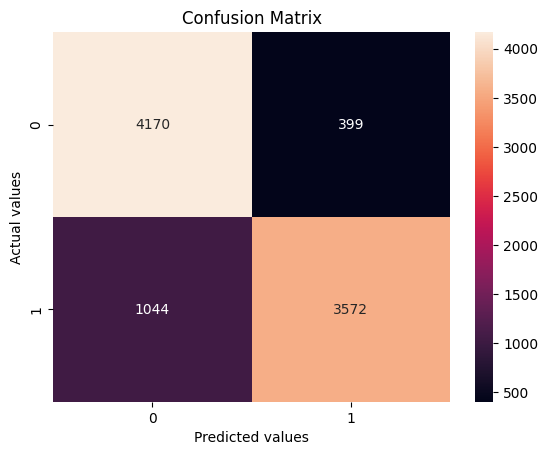

In [ ]:
#Confusion matrix and classification report

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

print(classification_report(y_test, y_test_pred_dt))


There were 30616 records in dataset,out of which 70% of the data was given for training the model and 30% of the data , i.e 9185 records ,were given for testing the model. and out of 9185 records ,1443 records were misclassified

#Implementing the Random Forest Model

In [ ]:
#Fitting a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#accuracy on training data

In [ ]:
y_train_pred_rf = classifier.predict(X_train)
training_data_accuracy_rf = accuracy_score(y_train,y_train_pred_rf)

print(training_data_accuracy_rf)

0.8401381176799962


In [ ]:
#accuracy on training data

In [ ]:
y_test_pred_rf = classifier.predict(X_test)
test_data_accuracy_rf = accuracy_score(y_test,y_test_pred_rf)

print(test_data_accuracy_rf)

0.8437670114316821


              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4569
           1       0.90      0.78      0.83      4616

    accuracy                           0.84      9185
   macro avg       0.85      0.84      0.84      9185
weighted avg       0.85      0.84      0.84      9185

[[4165  404]
 [1031 3585]]


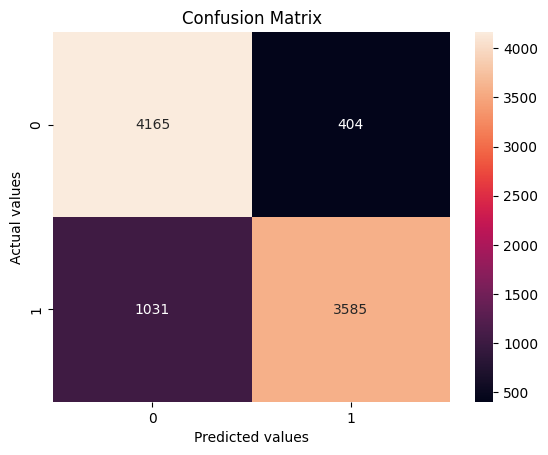

In [ ]:
#Confusion matrix and classification report

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

print(classification_report(y_test, y_test_pred_rf))
print(matrix)

There were 30616 records in dataset,out of which 70% of the data was given for training the model and 30% of the data , i.e 9185 records ,were given for testing the model. and out of 9185 records ,1435 records were misclassified

##Implementing the Support Vector Machines Model

In [ ]:
#Importing SVM model
from sklearn.svm import SVC
sv= SVC()

#Train the model using the training sets
sv.fit(X_train, y_train)


SVC()

In [ ]:
#accuracy on training data
y_train_pred_svm = sv.predict(X_train)
training_data_accuracy_svm = accuracy_score( y_train,y_train_pred_svm,)

print(training_data_accuracy_svm)

0.839998133544865


In [ ]:
#accuracy on test data
y_test_pred_svm = sv.predict(X_test)
test_data_accuracy_svm = accuracy_score( y_test,y_test_pred_svm)

print(test_data_accuracy_svm)

0.8432226456178552


              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4569
           1       0.90      0.77      0.83      4616

    accuracy                           0.84      9185
   macro avg       0.85      0.84      0.84      9185
weighted avg       0.85      0.84      0.84      9185

[[4170  399]
 [1041 3575]]


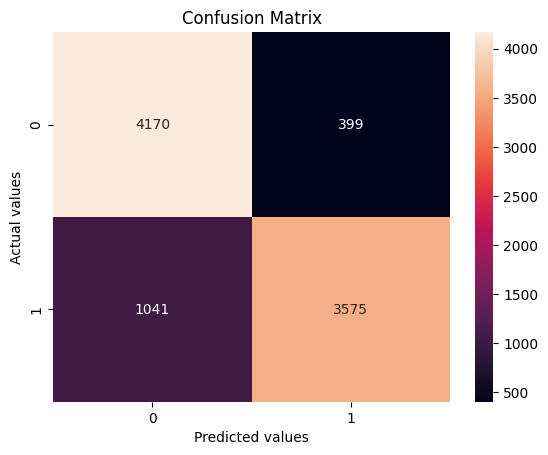

In [ ]:
#Confusion matrix and classification report

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

print(classification_report(y_test, y_test_pred_svm))
print(matrix)


There were 30616 records in dataset,out of which 70% of the data was given for training the model and 30% of the data , i.e 9185 records ,were given for testing the model. and out of 9185 records ,1440 records were misclassified

## Implementing the K-Nearest Neighbor Model

In [ ]:
#Fitting K-NN classifier to the Training data:
from sklearn.neighbors import KNeighborsClassifier
classifiers= KNeighborsClassifier()

#Fitting K-NN classifier to the Training data:
classifiers.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#accuracy on training data
y_train_pred_knn = log.predict(X_train)
training_data_accuracy_knn = accuracy_score(y_train,y_train_pred_knn)

print(training_data_accuracy_knn)

0.8259063972749755


In [ ]:
#Predicting the test set result
y_test_pred_knn = classifiers.predict(X_test)
test_data_accuracy_knn = accuracy_score(y_test,y_test_pred_knn)

print(test_data_accuracy_knn)

0.8418072945019053


              precision    recall  f1-score   support

           0       0.80      0.90      0.85      4569
           1       0.89      0.78      0.83      4616

    accuracy                           0.84      9185
   macro avg       0.85      0.84      0.84      9185
weighted avg       0.85      0.84      0.84      9185



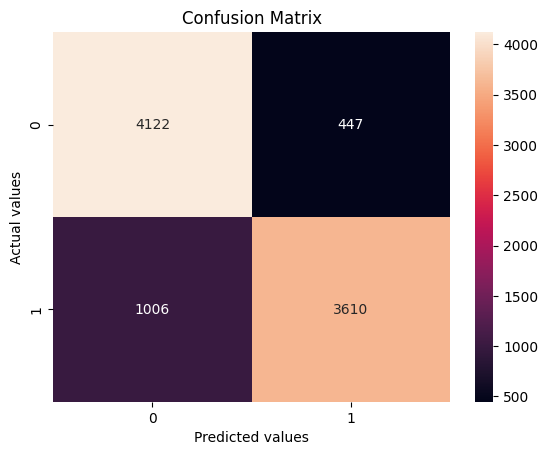

In [ ]:
#Confusion matrix and classification report

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_test_pred_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

print(classification_report(y_test, y_test_pred_knn))

There were 30616 records in dataset,out of which 70% of the data was given for training the model and 30% of the data , i.e 9185 records ,were given for testing the model. and out of 9185 records ,1452 records were misclassified